In [3]:
# %load "include.py"
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False 
#한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [4]:
import seaborn as sns

In [5]:
sns.__version__

'0.10.0'

In [6]:
titanic = sns.load_dataset('titanic')
print(titanic.head())
print()
titanic.info()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-n

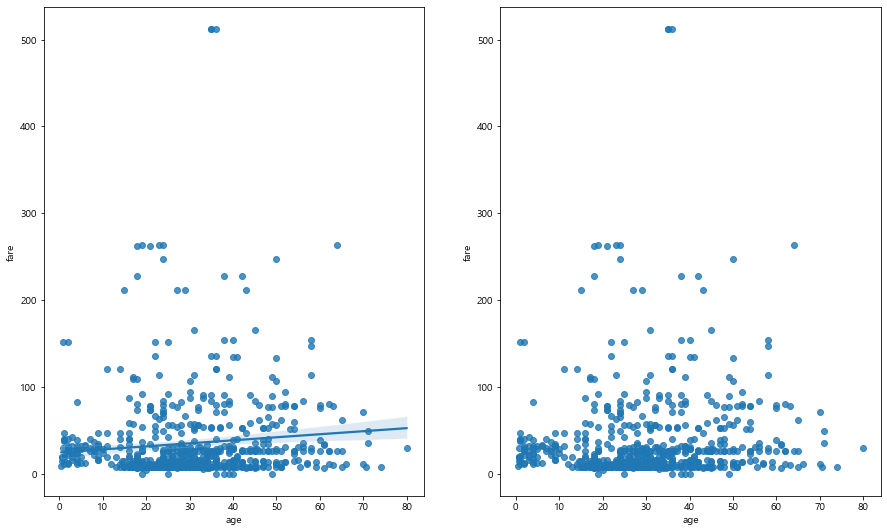

In [7]:
#  회귀선이 있는 scatter , 회귀선이 없는 2개의 그래프
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.set_style('darkgrid')
sns.regplot(x='age', y='fare',
           data=titanic,
           ax=ax1)
           
sns.regplot(x='age', y='fare',
           data=titanic,
           ax=ax2,
           fit_reg=False)
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

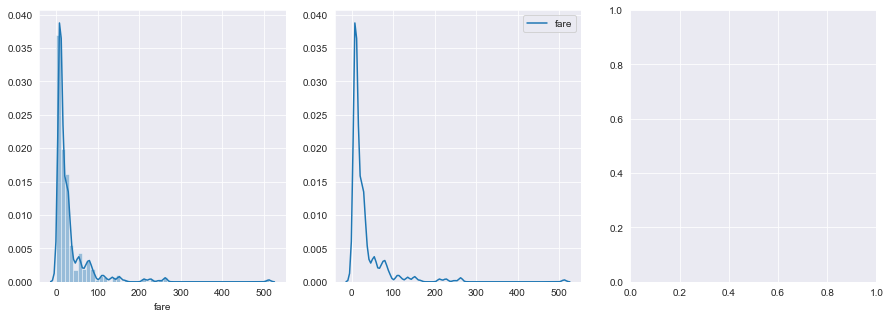

In [8]:
# distplot() : 커널 밀도
# 스타일 테마 설정 (5가지 : darkgrid, whitegrid, )
# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# distplot
sns.distplot(titanic.fare, ax=ax1) 

# kdeplot
sns.kdeplot(titanic.fare, ax=ax2) 

# histplot
# sns.histplot(titanic.fare) #, ax=ax3) 
sns.histplot(x='fare', data=titanic,  ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kedplot')
ax3.set_title('titanic fare - histplot')

plt.show()

In [9]:
# 지도 그래프
import folium
import pandas as pd

In [10]:
!pip install folium

In [11]:
# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', 
                        zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [12]:
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx')
df # 대학교명 위도 경도의 자료가 있음
df.set_index('Unnamed: 0',inplace =True)
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                         zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도) :
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
    
seoul_map.save('dataset/seoul.html')

In [13]:
df.rename(index = {'Unnamed: 0':'name'}, inplace =True)

In [14]:
df = pd.read_excel('./dataset/서울지역 대학교 위치.xlsx',header=None,
                  skiprows=1)
df.columns = ['학교명','위도','경도']
# df # 대학교명 위도 경도의 자료가 있음
# df.set_index('Unnamed: 0',inplace =True)
df
# 학교명을 인덱스로 설정
df.set_index('학교명',inplace = True)
df.head()

,위도,경도
학교명,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [15]:
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                         zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도) :
    folium.CircleMarker([lat, lng],
                    radius=10,         # 원의 반지름
                    color='black',     # 원의 둘레 색상
                    fill=True,
                    fill_color='red', # 원을 채우는 색
                    fill_opacity=0.7, # 투명도
                    popup=name).add_to(seoul_map)
    
seoul_map.save('dataset/seoul_circle.html')

In [16]:
import json

In [17]:
# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path = './dataset/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine= 'openpyxl')
df.columns = df.columns.map(str) # 데이터를 전부 string으로 변경

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './dataset/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))#에러시->except로
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

In [18]:
# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)
#                                           줌확대 9번까지
# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],
                 key_on='feature.properties.name',
                 ).add_to(g_map)

# 지도를 HTML 파일로 저장하기
g_map.save('./dataset/gyonggipopulation' + year + '.html')

In [19]:
# 누락데이터 처리
import pandas as pd
import seaborn as sns

In [51]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [29]:
# deck 컬럼의 값들의 갯수를 세어 봄 df.value_counts(): 유니크한 값들의 갯수
#                                                      Nan 제외
print(df['deck'].value_counts())
deck_cnt = df['deck'].value_counts(dropna = False) # Nan 갯수도 포함
print(deck_cnt)
print()

# isnull() 메서드로 누락된 데이터 찾기, null -> True, 값이 있으면 False 반환
print(df.head().isnull())

# isnull() 과 sum() 함수를 이용하여 누락된 데이터 개수 찾기
df['deck'].isnull().sum()
df.isnull().sum(axis=0) # age, deck, embarked, embark_town -> null data 포함

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
# 반복문으로 Nan 데이터 개수 계산하기
nan_data = df.isnull()
for col in nan_data.columns:
    nan_cnt = nan_data[col].value_counts() # 각 열의 Nan 개수 파악
    
    try:
        print(col, ':' ,nan_cnt[True]) # Nan 값이 존재하면 개수를 출력
    except:
        print(col,':',0) # Nan 값이 없으면 0을 출력
        
# Nan 데이터 확인 -> 어떻게 처리 할 건지 ?
# Nan 데이터가 있는 컬럼을 삭제?, Nan 데이터가 있는 행을 삭제?

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [38]:
# df.dropna() : axis = 1 열을 삭제, axis = 0 행을 삭제
# dropna() : Nan이 존재하는 컬럼을 삭제, 개수가 500 이상인 컬럼만 삭제
df_thresh = df.dropna(axis =1, thresh=500) # axis = 'columns','deck' 삭제
df_thresh.info()


# age에 Nan이 존재하는 행을 삭제
df_age = df.dropna(subset=['age'],how = 'any', axis=0)
# any 여러컬럼의 값중 하나라도 Nan이면 삭제,
# all 여러컬럼의 값중 전부가 Nan이면 삭제
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      

In [47]:
# 컬럼 리스트 : Nan이 존재하는 컬럼 리스트
nan_col = []
nan_data = df.isnull()
for col in nan_data.columns:
    
    try:
        nan_col.append(col) 
    except:
        continue
# Nan이 존재하는 모든 행을 삭제
df_nan = df.dropna(subset=nan_col ,how = 'any', axis=0)
print(nan_col)
df_nan.info()

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), c

In [55]:
df.columns[df.isnull().sum() > 0] # Nan이 존재하는 컬럼명만 추출

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')

In [56]:
# nan_col = [ df.isnull().sum()>0 ]
print(len(nan_col), len(df.columns))
nan_col_names = list(df.columns[ df.isnull().sum() > 0 ])

1 15


In [57]:
df_nan = df.dropna(subset=nan_col_names, how = 'any', axis =0)
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [64]:
# 누락 데이터 치환 : df.fillna(값 또는 method=ffill/bfill, inplace = True)
print(df['age'].isnull().sum()) #Nan 존재 함

# Nan이 입력된 age를 평균 나이로 치환
df_age = df.copy()
df_age['age'].fillna(df_age['age'].mean(axis=0), inplace=True)
df_age.isnull().sum()
print(df['age'].head(10),df_age['age'].head(10))

177
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64 0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [79]:
# 누락 데이터 치환
# embark_town 825~831 행 출력
# 가장 빈번하게 나오는 값으로 치환
df.embark_town[825:832]
df['embark_town'].value_counts().idxmax() # 가장 빈번하게 발생하는 인덱스명
df_em = df.copy()
df_em['embark_town'].fillna(df_em['embark_town'].value_counts().idxmax(),
                           inplace = True)
df_em.embark_town[825:832]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object

In [78]:
# 누락 데이터 치환 : 이전 데이터로 치환
df_me = df.copy()
df_me['embark_town'].fillna(method = 'ffill', inplace = True)

print(df_me.embark_town[[828,829]],'\n',df.embark_town[[828,829]])

828    Queenstown
829    Queenstown
Name: embark_town, dtype: object 
 828    Queenstown
829           NaN
Name: embark_town, dtype: object


In [91]:
# 중복 데이터 처리 : df.duplicated() -> 중복 여부 확인
df1 = pd.DataFrame({'c1':['a', 'a','b','a','b'],
                   'c2':[1,1,1,2,2],
                   'c3':[1,1,2,2,2]})
print(df1)
print(df1.duplicated())
col_dup = df1['c1'].duplicated()
print('a:',col_dup)
# 중복된 데이터를 제거
df2 = df1.drop_duplicates()
df2

# 중복된 컬럼을 제거
df3 = df1.drop_duplicates(subset=['c2','c3'])
df3

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
0    False
1     True
2    False
3    False
4    False
dtype: bool
a: 0    False
1     True
2    False
3     True
4     True
Name: c1, dtype: bool


,c1,c2,c3
0,a,1,1
2,b,1,2
3,a,2,2


In [106]:
# titanic 에서 age, fare, class, alive 컬럼 가져와서 df_titanic 로 저장한 후
# Nan 있는 컬럼의 값의 숫자는 평균으로 문자는 이전 값으로 대체
df_titanic = df[['age','fare','class','alive']].copy()
df_titanic['age'].fillna(df_titanic['age'].mean(axis=0), inplace=True)
df_titanic['fare'].fillna(df_titanic['fare'].mean(axis=0), inplace=True)
df_titanic['class'].fillna(method = 'ffill', inplace=True)
df_titanic['alive'].fillna(method = 'ffill', inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [109]:
# 중복된 행 삭제 하기
df_titanic.drop_duplicates(inplace=True)
len(df_titanic)

746

In [111]:
# columns으로 중복된 값 삭제 하기
df_titanic.drop_duplicates(subset = ['age'],inplace = True)
df_titanic

,age,fare,class,alive
0,22.000000,7.2500,Third,no
1,38.000000,71.2833,First,yes
2,26.000000,7.9250,Third,yes
3,35.000000,53.1000,First,yes
5,29.699118,8.4583,Third,no
...,...,...,...,...
755,0.670000,14.5000,Second,yes
767,30.500000,7.7500,Third,no
803,0.420000,8.5167,Third,yes
843,34.500000,6.4375,Third,no


In [99]:
df_c = df[['age','fare','class','alive']]

In [114]:
# dataset/auto_mpg.csv
# 데이터 표준화
df = pd.read_csv('dataset/auto-mpg.csv',header=None)

# 컬럼 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [117]:
# 단위 환산 : mpg -> gallon -> kg으로 변환
mpg_to_kg = 1.60934 / 3.78541
df['kpl'] = (df['mpg'] * mpg_to_kg).round(2)#반올림하여 소수점 2미만 자름
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23


In [127]:
import numpy as np
# 자료형 변환
df['horsepower'].unique() # 중복되지 않은 값 보여줌
# 중간에 ? 발견 -> Nan으로 변경후 Nan처리함수 가능

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [128]:
df['horsepower'].replace('?',np.nan, inplace = True)
df['horsepower'].unique()

# 데이터 타입을 float으로 변경
df['horsepower'] = df['horsepower'].astype('float')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 26.6+ KB


In [125]:
# origin 숫자로 표기되어 있음
df.origin.unique() 
df.origin.replace({1:'USA', 2:'EU', 3:'JPN'}, inplace = True)
df.origin.unique()

# object를 카테고리로 변경
df.origin = df.origin.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 28.6+ KB


In [126]:
# 제조 년도 : model year -> 카테고리로 변경
df['model year'].unique()

# 숫자를 카테고리로 변경
df['model year'] = df['model year'].astype('category')
df.info()
df['model year'].unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 26.6+ KB


<bound method Series.unique of 0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model year, Length: 398, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]>

In [124]:
df.origin.unique()

array(['USA', 'JPN', 'EU'], dtype=object)

In [ ]:
# 데이터 전처리
# 1. 누락 데이터 처리 : 제거, 치환
# 2. 중복 데이터 처리 : 제거(행),컬럼..
# 3. 자료표준화
#    1) 단위 환산
#    2) 자료형 변경 : object -> float, object -> category
#       2.1) 변화 불가능한 자료는 Nan으로 치환하고 자료형 변경